In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/alyssa/Documents/FTW/Datasets/CC General.csv')

In [3]:
missing = data.isna().sum()

In [4]:
missing

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
data = data.fillna(data.median())

In [6]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
from sklearn.cluster import KMeans

In [54]:
features = ['PAYMENTS', 'BALANCE', 'PURCHASES']
X = data[features]

In [55]:
X.head()

,PAYMENTS,BALANCE,PURCHASES
0,201.802084,40.900749,95.40
1,4103.032597,3202.467416,0.00
2,622.066742,2495.148862,773.17
3,0.000000,1666.670542,1499.00
4,678.334763,817.714335,16.00


In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 3 columns):
PAYMENTS     8950 non-null float64
BALANCE      8950 non-null float64
PURCHASES    8950 non-null float64
dtypes: float64(3)
memory usage: 209.9 KB


In [57]:
squared_errors = []

for i in range (1,21):
    km = KMeans(n_clusters=i, random_state=101)
    km.fit(X)
    squared_errors.append(km.inertia_)

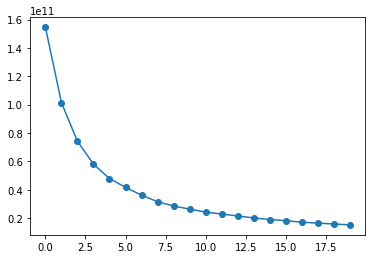

In [58]:
plt.plot(squared_errors, marker = 'o')

In [59]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(X)
labels = km.predict(X)
new_data = X.copy()
new_data['labels'] = labels

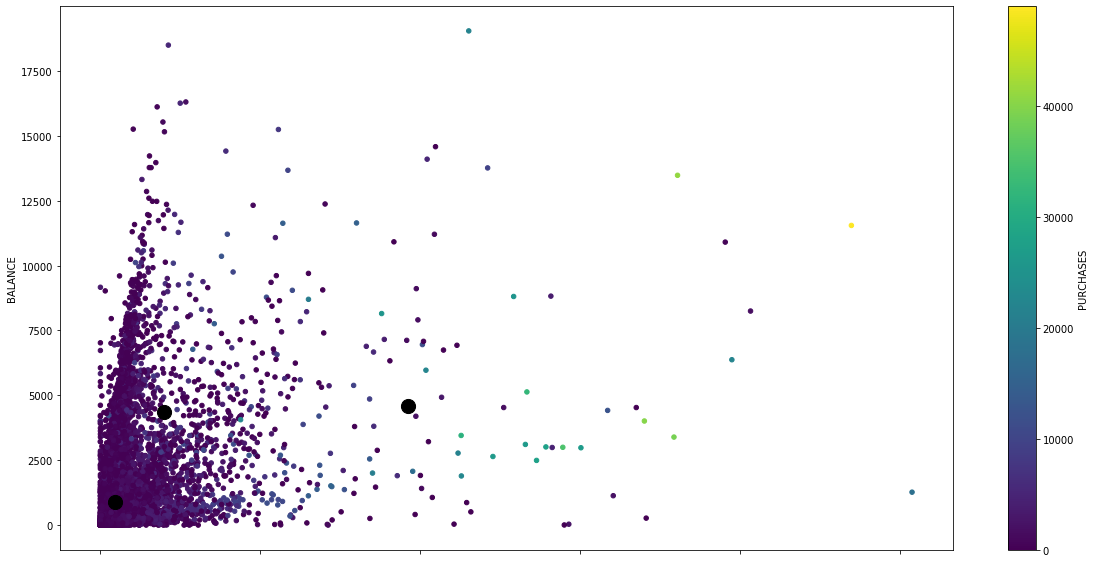

In [60]:
new_data.plot.scatter(x='PAYMENTS', 
                      y='BALANCE', 
                      c='PURCHASES', 
                      cmap='viridis',
                      figsize=(20, 10))

# Get cluster centers
centers = km.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], s=200, color='black')

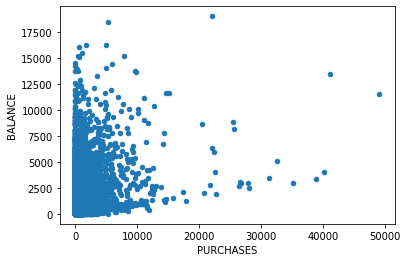

In [43]:
X.plot.scatter('PURCHASES', 'BALANCE')

In [61]:
# CLUSTER 0: The Underspenders

cluster_0 = new_data[new_data['labels']==0]
cluster_0.describe()

,PAYMENTS,BALANCE,PURCHASES,labels
count,7177.000000,7177.000000,7177.000000,7177.0
mean,929.527935,869.941784,607.914631,0.0
std,880.446766,955.362618,783.767921,0.0
min,0.000000,0.000000,0.000000,0.0
25%,315.301272,78.443220,41.400000,0.0
50%,630.560850,511.569448,312.100000,0.0
75%,1265.870255,1373.252757,851.210000,0.0
max,5679.772590,4626.278301,5671.860000,0.0


In [62]:
#CLUSTER 1: Underspender

cluster_1 = new_data[new_data['labels']==1]
cluster_1.describe()

,PAYMENTS,BALANCE,PURCHASES,labels
count,117.000000,117.000000,117.000000,117.0
mean,19227.802837,4607.774475,10862.963504,1.0
std,8484.784996,4002.787635,10419.563043,0.0
min,7116.531862,4.382924,0.000000,1.0
25%,12493.778940,1411.602230,1788.840000,1.0
50%,17194.627560,3108.393701,10221.350000,1.0
75%,22558.284570,6928.721377,14332.920000,1.0
max,50721.483360,19043.138560,49039.570000,1.0


In [63]:
# CLUSTER 2: 

cluster_2 = new_data[new_data['labels']==2]
cluster_2.describe()

,PAYMENTS,BALANCE,PURCHASES,labels
count,1656.000000,1656.000000,1656.000000,1656.0
mean,3979.929077,4359.521686,2019.754360,2.0
std,2724.787908,2790.031499,2414.112847,0.0
min,0.000000,0.000000,0.000000,2.0
25%,1732.227643,2240.839170,0.000000,2.0
50%,3396.097962,4357.972805,1000.275000,2.0
75%,5553.835968,5899.968518,3494.905000,2.0
max,15043.665080,18495.558550,14215.000000,2.0
